# Demo av regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [3]:
# X, y = make_regression(n_samples=5000, n_features=3, noise=5, random_state=42) 
X, y = make_regression(n_samples=5000, n_features=1, noise=5, random_state=42) 
print(X[:4, :])
print(y[:4])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[[ 0.32674476]
 [ 2.56008454]
 [-0.61138525]
 [-0.89783007]]
[ 11.95056972  39.42063856 -10.40932904 -15.19118658]


In [4]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

rf = RandomForestRegressor(random_state=42)
hyperparams = {
    'n_estimators': [50, 100, 200],       # number of trees
    'max_depth': [None, 5, 10],           # maximum depth of each tree
    'min_samples_split': [2, 5, 10],      # min samples to split a node
}
gs_rf = GridSearchCV(estimator=rf, param_grid=hyperparams, cv=3, n_jobs=-1, verbose=2)
gs_rf.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

### Plotting

In [6]:
X_range = np.linspace(X_test.min(), X_test.max(), 100)

lin_preds = lin_reg.predict(X_range.reshape(-1, 1))
rf_preds = gs_rf.predict(X_range.reshape(-1, 1))

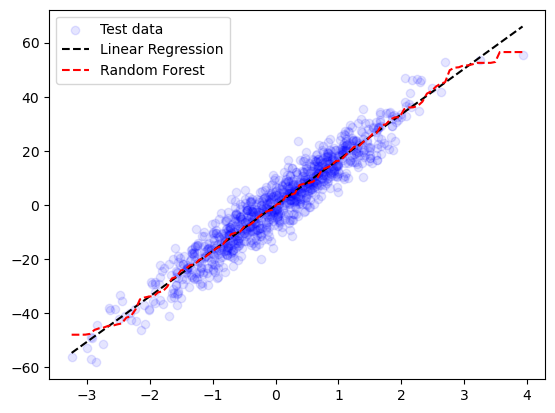

In [7]:
fig, ax = plt.subplots()
ax.scatter(X_test, y_test, c='b', alpha=0.1, label='Test data')
ax.plot(X_range, lin_preds, 'k--', label='Linear Regression')
ax.plot(X_range, rf_preds, 'r--', label='Random Forest')
ax.legend()